<h2>Linear Model Reference Adaptive Control (MRAC)</h2>
<h3>Theoretical Formulation</h3>
This code is a direct method of implementing MRAC to a simple scalar system. MRAC is a method used when there is uncertainty in a real life plant. Ideally, what MRAC hopes to achieve is to adapt the real life plant to the dynamics of a reference model. Consider a linear plant with some uncertainty $f(x,t) = \theta^* x$ where $\theta$ is an unknown parameter constant:  <br>
$$\dot{x} = ax + b(u+f(x,t))$$ <br>
Now, we let's consider a reference model for the our plant to follow: <br> <br>
$$ \dot{x}_m = a_m x_m + b_m r $$ <br>
Here, our access to control is u. Consider an ideal control input u*, expressed as: <br> <br>
$$ u^* = k^*_x x + k^*_r r - \theta^* x$$ <br>
Substituting $u^*$ into our first equation, we get: <br> <br>\begin{align}
\dot{x} &= ax + b\theta^*x + b( k^*_x x + k^*_r r - \theta^* x)
\\ &= (a+bk^*_x)x + bk_r^* r
\end{align} <br>

Comparing $\dot{x}$ and $\dot{x}_m$, supposing that we have adapted to the uncertainty $f(x,t) = \theta^* x$, we can equate:
<br> <br>
\begin{align}
k^*_x &= \dfrac{a_m - a}{b} \\ 
k^*_r & = \dfrac{b_m}{b}
\end{align} <br> 
so that our plant follows our reference model. However, since the uncertainty in our original plant includes $f(x,t)$, we have to find an adaptation law that allows our system to be stable, in other words use Lyapunov's Stability Theorem to help us determine stability of the system. <br>
At this point, there are a few insights that should be explicitly pointed out: <br>
1. $a \neq a_m \implies$ that the plant has its own dynamic response (by the virtue of $a$), but since we want we want our plant to follow the reference model ($a_m$), we add the term $k^*_x$ to our control law. This argument could be made to the term $b$ as well.  
<br>
2. The complexity of the control law depends on the number of known terms that we have in the system. Suppose that $a$ and $b$ are unknown, then $k^*_x$ and $k^*_r$ will require its own adaptation term as well. 

3. $x_m$ and $x$ are not the same state variables. $x_m$ is a model we want to follow. $x$ is the true representation of the current state. 

Let's choose a Lyapunov Canditate Function as: 
<br>
\begin{align}
V(e, \tilde{\theta}) &= 1/2(e^2 + \gamma \tilde{\theta}^2)
\end{align}
<br>
where $e$ is the error signal and $\tilde{\theta} = \theta(t) - \theta^*$ . The derivative of the error could be expressed as: 
<br> <br>
\begin{align}
\dot{e} &= \dot{x}_m - \dot{x} \\ 
& = bx\tilde{\theta} + a_m(x_m - x) \\ 
& = bx\tilde{\theta} + a_me
\end{align}
<br>

Then, the derivative of the Lyapunov Function could be expressed: 

<br>
\begin{align}
\dot{V}(e,\tilde{\theta}) &= \dfrac{dV}{de} \dfrac{de}{dt} + \dfrac{dV}{d\tilde{\theta}} \dfrac{d\tilde{\theta}}{dt} \\ 
& = e \dot{e} + \gamma \tilde{\theta} \dot{\tilde{\theta}} \\ 
& = e (bx\tilde{\theta} + a_m\tilde e) + \gamma \tilde{\theta} \dot{\tilde{\theta}}
\end{align}
<br>

To ensure that $\dot{V}$ can be negative semi-definite, we set $\dot{\tilde{\theta}} = -\gamma x e b $, thus 

<br>
\begin{align}
\dot{V}(e,\tilde{\theta}) &= a_m e^2
\end{align}
<br>

If $a_m < 0$, then $\dot{V}$ is negative semi-definite. Thus, our final control law for this system is: 

<br>
\begin{align}
u &= -k^*_x x + k^*_r r - x \theta(t)  \\ 
&= -k^*_x x + k^*_r r - x \int^t_0{\dot{\tilde{\theta}}} dt 
\end{align}
<br>

Right now, we can only conclude that our system is stable. Using Barbalat's Lemma, we can derive more insights here. Barbalat's Lemma for stability says that if we have a positive definite Lyapunov Function $V(x,t)$ that is bounded as $t \to \infty$ and if $\dot{V}(x,t)$ is negative semi-definite and uniformly continuous $\forall t \in [0, \infty)$, then $\dot{V}(x,t) \to 0$ as $t \to \infty$. 

<br>
Since $\dot{V}(e,\tilde{\theta})$ is negative semi-definite, we can conclude that $e, \tilde{\theta}$ are both bounded. This could be shown by: 
<br> <br>
\begin{align}
lim(V(e(t \to \infty), \tilde{\theta}(t \to \infty)) - V(e_0, \tilde{\theta}_0) &= a_m \int^{\infty}_{t_0}{ e^2} \\
& = 2a_m ||e||^2_2 < 0 
\end{align}<br>

Now, we find that $\ddot{V}(e,\tilde{\theta})$.
<br>
\begin{align}
\ddot{V}(e,\tilde{\theta}) & = 2 a_m e \dot{e} \\ 
& = 2 a_m^2 e^2 + 2a_m e b x \tilde{\theta}
\end{align}<br>

Now we found that it exists, and since $\tilde{\theta}, e, x$ are all bounded, we know that $\ddot{V}(e,\tilde{\theta})$ has a finite limit as well. Hence, this fulfils the conditions of Barbalat's Lemma and thus $\dot{V}(e,\tilde{\theta})$ as $t \to \infty \implies$ $e \to 0$ as $t \to \infty$. We can conclude that our error tends to zero, which means our plant follows our intended model. However, we cannot verify that our parameter estimation error $\tilde{\theta}$ goes to zero. 


<h3>Example</h3>

Suppose we have the values: 
<br>
\begin{align}
a &= 1 \\ a_m &= -1 \\ b &= 1 \\ b_m &= 1 \\ f(x) &= \theta^x x \\ \theta &= c 
\end{align}
<br> 
where c is a constant.

<h4>Step 1</h4>
<br> We work on the code now. To start off, we import some standard libraries and standard functions.<br> 

In [1]:
import numpy as np 
import scipy as sp 
from matplotlib import pyplot as plt 
from scipy.integrate import odeint

def rk4(x0, u, f, h = 0.01):
    k1 = f(x0, u)
    k2 = f(x0 + h*(k1/2), u)
    k3 = f(x0 + h*(k2/2), u)
    k4 = f(x0 + h*k3, u)

    return h*((k1 + 2*k2 + 2*k3 + k4)/6)

def fx_model(x1 ,r):
    x_dot1 = -1*x1 + r
    return x_dot1

def fx_plant(x1, u):
    x_dot1 = x1 + b*u + b*(theta_c*x1)
    return x_dot1

def euler_int(x0,dx,h):
    x0 = x0+dx*h
    return x0

<h4>Step 2</h4>
We continue setting up our problem by putting in our parameters required. 

In [5]:
current_time = 0
theta_c = 4
a = 1 
b = 1 
a_m = -1 
b_m = 1 
r_t = np.sin(current_time)
theta_i = 0 
x0_model = 2
x0_plant = 2 
N = 10000
gamma = 3 #adaptive rate
adaptive_law = 0

t = np.zeros(N)
theta_list = np.zeros(N)
x_model = np.zeros(N)
x_plant = np.zeros(N)
ref = np.zeros(N)
e = np.zeros(N)

<h4>Step 3</h4>
We start our simulation loop here. I prefer simulating the entire system step by step. Also, I decided to change the value of our parametric uncertainty from $\theta^* = 4$ to $\theta^* = 6$. 

In [3]:
for i in range(N):
    if i > 3000:
        theta_c = 6
    x0_model = x0_model + rk4(x0_model, r_t, fx_model)
    u = -2*x_plant[i] + r_t - theta_i*x_plant[i]
    x0_plant = x0_plant + rk4(x0_plant, u, fx_plant)
    error = x0_model - x0_plant
    adaptive_law = -gamma*x0_plant*error
    theta_i = euler_int(theta_i, adaptive_law, 0.01)
    current_time = current_time + 0.01
    r_t = np.sin(current_time)
    try:
        x_model[i+1] = x0_model
        x_plant[i+1] = x0_plant
        t[i+1] = current_time
        ref[i+1] = r_t
        e[i+1] = error
        theta_list[i+1] = theta_i
    except: 
        pass

<h4>Step 4</h4>
All we have to do now is to plot. 

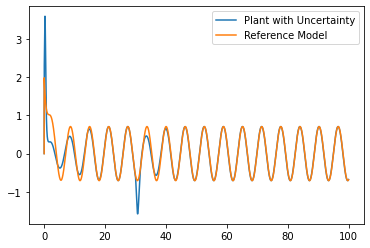

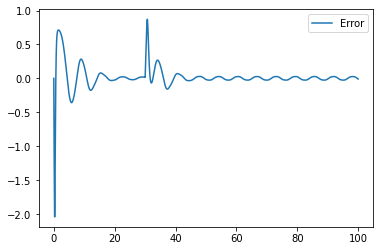

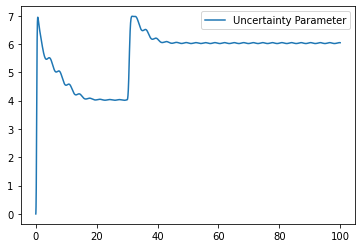

In [4]:
plt.plot(t, x_plant, label = "Plant with Uncertainty")
plt.plot(t, x_model, label = "Reference Model")
plt.legend()
plt.show()

plt.plot(t, e, label = "Error")
plt.legend()
plt.show()

plt.plot(t, theta_list, label = 'Uncertainty Parameter')
plt.legend()
plt.show()